# Исследование надежности заемщиков


### Задачи:
1) Подготовить данные для анализа, провести предобработку
2) Иследовать данные и ответить на вопросы:
    * Есть ли зависимость между количеством детей и возвратом кредита в срок?
    * Есть ли зависимость между семейным положением и возвратом кредита в срок?
    * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    * Как разные цели кредита влияют на его возврат в срок?
  

## Подготовка к иследованию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

посмотрим на данные

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


информация о данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
# data.isna().sum()
# data.count()
print((data.isna().sum() * 100) / len(data))

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64


**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Выведием перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся что пропусков неосталось**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные и ответьте на вопросы

<a class="anchor" id="children"></a>

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# группа по кол-во детей, кол-во просрочек в каждой
# print(data.loc[data['debt'] == 1, 'children'].value_counts())
filter = data.loc[data['debt'] == 1]
counts = filter['children'].value_counts().to_frame()
counts.reset_index(inplace=True)
counts.columns = ['children', 'debt_1']

print(counts)

   children  debt_1
0         0    1063
1         1     444
2         2     194
3         3      27
4         4       4


В прямом сравнении мы видим зависимость того что отсутствие детей прямо влияет на возвратность по взятым кредитным обязательствам. Посмотрим глубже и определим так ли это на самом деле.

In [23]:
def group_data(name_group, group_object):
    """
    ф-я принимает название группы
    return:
    Группу: Group Number Children
    общее кол-во с данным кол-вом детей: All Peopele
    кол-во просрочек на эту группу: Debt Count
    %-е отношение просрочек к общему кол-ву: % Debt
    """
    # Кол-во всего в группе кол-ва детей
    count_ch = data.loc[data[group_object] == name_group, group_object].count()
    # Кол-во просрочек в данной групе
    debt_ch = data.loc[(data[group_object]==name_group)&(data['debt']==1), 'debt'].count()
    # %-е отношение просрочек в кол-ву в группе
    percent = round(debt_ch / count_ch * 100, 2)
    result_table = pd.DataFrame({
        'Name Group': [name_group],
        'All Peopele': [count_ch],
        'Debt Count': [debt_ch],
        '% Debt': [percent]
    })
    
    return result_table

 Name Group  All Peopele  Debt Count  % Debt
          0        14091        1063    7.54
          1         4808         444    9.23
          2         2052         194    9.45
          3          330          27    8.18
          4           41           4    9.76
          5            9           0    0.00


<AxesSubplot:xlabel='Name Group', ylabel='% Debt'>

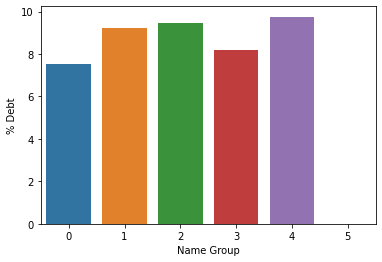

In [24]:
array_data = []
# Группы по кол-ву детей.
count_children_groups = data['children'].unique()
group_object = 'children'
for group in count_children_groups:
    array_data.append(group_data(group, group_object))
    
combined_df = pd.concat(array_data, axis=0).sort_values(by='Name Group')

print(combined_df.to_string(index=False))
seaborn.barplot(x=combined_df['Name Group'], y=combined_df['% Debt'])

In [32]:
# Комментарий ревьюера 2
# Создаем копию датасета, что бы не работать с исходным
temp = data.copy()
# Напишем функцию, так как все задачи аналогичны
def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    # Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
    
que('children')

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091.000,1063.000,0.075
1,4808.000,444.000,0.092
2,2052.000,194.000,0.095
3,330.000,27.000,0.082
4,41.000,4.000,0.098
5,9.000,0.000,0.000


**Вывод:** Прямой ярко выраженной зависимости между кол-вом детей и наличием просрочек НЕТ. Однако можно заметить что семьи без детей выплачивают кредиты вовремя чаще чем семьи с детьми, одним и более.
Семьи с пятью детьми выпадают из расчета так как их кол-во в общем кол-ве очень мало = 9ти и влияние на общую статистику неоказывает.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

<a class="anchor" id="family_status"></a>

           Name Group  All Peopele  Debt Count  % Debt
       вдовец / вдова          951          63    6.62
            в разводе         1189          84    7.06
      женат / замужем        12261         927    7.56
     гражданский брак         4134         385    9.31
Не женат / не замужем         2796         273    9.76


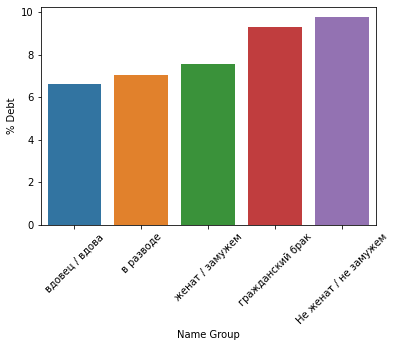

In [25]:
array_data = []
# Группы по family_status.
family_status_groups = data['family_status'].unique()
group_object = 'family_status'
for group in family_status_groups:
    array_data.append(group_data(group, group_object))
    
combined_df = pd.concat(array_data, axis=0).sort_values(by='% Debt')

print(combined_df.to_string(index=False))
chart = seaborn.barplot(x=combined_df['Name Group'], y=combined_df['% Debt'])
plt.xticks(rotation=45)
plt.show()

Получим разницу в возрасте между групой "вдовец / вдова" и "Не женат / не замужем".

In [26]:
# Получим средний возраст группы "вдовец / вдова"
group_6_62 = data.loc[data['family_status']=='вдовец / вдова', 'dob_years'].mean()
# Средней возвраст группы "Не женат / не замужем"
group_9_76 = data.loc[data['family_status']=='Не женат / не замужем', 'dob_years'].mean()

# Разница в возрасте между этими групами 
print(round(group_6_62 - group_9_76, ), 'лет')



18 лет


**Вывод:** Аналогичная ситуация, сильно выраженной зависимости семейного положения к наличию просроченных кредитных обязательств нет. Можно лиш отметить, что наличие просрочки меньше у группы "вдовец/вдова" по оттношению к группе "Не женет/не замужем" это можно обьеснить разницей в среднем созрасте между данными групами, она составляет 18 лет. Люди в возрасте более ответственные.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<a class="anchor" id="total_income_category"></a>
На основании сформированых групп уровней доходов
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [27]:
array_data = []
# Группы по доходу.
income_groups = data['total_income_category'].unique()
group_object = 'total_income_category'
for group in income_groups:
    array_data.append(group_data(group, group_object))
    
combined_df = pd.concat(array_data, axis=0).sort_values(by='Name Group', ascending=False)

print(combined_df.to_string(index=False))

Name Group  All Peopele  Debt Count  % Debt
         E           22           2    9.09
         D          349          21    6.02
         C        15921        1353    8.50
         B         5014         354    7.06
         A           25           2    8.00


Группы с кол-вом (All Peopele) менее 100 нужно исключить из выборки в связи с не актуальностью данных из за малого кол-ва. 

In [28]:
combined_df = combined_df.loc[combined_df['All Peopele'] > 100].sort_values(by='Name Group', ascending=False)
print(combined_df.to_string(index=False))
# combined_df['Group'] = pd.qcut(combined_df['All Peopele'], q=2)
# print(combined_df[['Group', 'All Peopele']])

Name Group  All Peopele  Debt Count  % Debt
         D          349          21    6.02
         C        15921        1353    8.50
         B         5014         354    7.06


**Вывод:** Максимальную просрочку по кредитным обязательствам имеет группа "С" с диопазоном - 50001–200000, но она же относится к самой массовой группе заемщиков. С этим и связан ее повышеный % просрочек.

In [34]:
# Комментарий ревьюера 2
temp = data.copy()
start, stop = 3, 8 # начальное и конечное количество категорий
while start <= stop:
    temp['new_category'] = pd.qcut(temp['total_income'], q=start, precision=0)
    que('new_category')
    start += 1

,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 119218.0]",7111.000,580.000,0.082
"(119218.0, 172357.0]",7238.000,627.000,0.087
"(172357.0, 2265604.0]",6982.000,525.000,0.075


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 107507.0]",5333.000,427.000,0.080
"(107507.0, 142594.0]",5450.000,480.000,0.088
"(142594.0, 195842.0]",5216.000,444.000,0.085
"(195842.0, 2265604.0]",5332.000,381.000,0.071


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 98514.0]",4267.000,344.000,0.081
"(98514.0, 132113.0]",4266.000,358.000,0.084
"(132113.0, 161380.0]",4266.000,373.000,0.087
"(161380.0, 214604.0]",4266.000,358.000,0.084
"(214604.0, 2265604.0]",4266.000,299.000,0.070


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 92092.0]",3556.000,285.000,0.080
"(92092.0, 119218.0]",3555.000,295.000,0.083
"(119218.0, 142594.0]",3672.000,327.000,0.089
"(142594.0, 172357.0]",3566.000,300.000,0.084
"(172357.0, 228893.0]",3427.000,276.000,0.081
"(228893.0, 2265604.0]",3555.000,249.000,0.070


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 87287.0]",3048.000,233.000,0.076
"(87287.0, 113563.0]",3047.000,262.000,0.086
"(113563.0, 137465.0]",3047.000,263.000,0.086
"(137465.0, 155314.0]",3047.000,264.000,0.087
"(155314.0, 184554.0]",3047.000,257.000,0.084
"(184554.0, 242009.0]",3047.000,242.000,0.079
"(242009.0, 2265604.0]",3048.000,211.000,0.069


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 83837.0]",2667.000,206.000,0.077
"(83837.0, 107507.0]",2666.000,221.000,0.083
"(107507.0, 127546.0]",2666.000,233.000,0.087
"(127546.0, 142594.0]",2784.000,247.000,0.089
"(142594.0, 166525.0]",2549.000,223.000,0.087
"(166525.0, 195842.0]",2667.000,221.000,0.083
"(195842.0, 254250.0]",2665.000,196.000,0.074
"(254250.0, 2265604.0]",2667.000,185.000,0.069


#### Как разные цели кредита влияют на его возврат в срок?

<a class="anchor" id="purpose_category"></a>
На основании подготовленых групп целевых кредитов в столбце
'purpose_category'.  
'операции с автомобилем',  
'операции с недвижимостью',  
'проведение свадьбы',  
'получение образования'.

In [29]:
array_data = []
# Группы по целевым гредитам.
purpose_groups = data['purpose_category'].unique()
group_object = 'purpose_category'
for group in purpose_groups:
    array_data.append(group_data(group, group_object))
    
combined_df = pd.concat(array_data, axis=0).sort_values(by='Name Group', ascending=False)

print(combined_df.to_string(index=False))

              Name Group  All Peopele  Debt Count  % Debt
      проведение свадьбы         2313         183    7.91
   получение образования         3988         369    9.25
операции с недвижимостью        10751         780    7.26
  операции с автомобилем         4279         400    9.35


In [30]:
# Проверим зависимость от возраста.
group_7_91 = data.loc[data['purpose_category']=='проведение свадьбы', 'dob_years'].mean()
group_9_25 = data.loc[data['purpose_category']=='получение образования', 'dob_years'].mean()
group_7_26 = data.loc[data['purpose_category']=='операции с недвижимостью', 'dob_years'].mean()
group_9_35 = data.loc[data['purpose_category']=='операции с автомобилем', 'dob_years'].mean()

print(group_7_91)
print(group_9_25)
print(group_7_26)
print(group_9_35)
# Зависимость от возраста заемщика не выевлена.

43.13013402507566
43.4154964894684
43.16891451957957
43.50362234166862


In [31]:
# Порверим зависимость от уровня доходов заемщика.
purpose_category = data['purpose_category'].unique()

for i in purpose_category:
    rows = (data['purpose_category'] == i)
    print(i)
    test = data.loc[rows, 'total_income_category'].value_counts()
    print(test)
    print('---------------')

операции с недвижимостью
C    7997
B    2558
D     168
A      17
E      11
Name: total_income_category, dtype: int64
---------------
операции с автомобилем
C    3181
B    1022
D      72
A       2
E       2
Name: total_income_category, dtype: int64
---------------
получение образования
C    3014
B     890
D      75
E       5
A       4
Name: total_income_category, dtype: int64
---------------
проведение свадьбы
C    1729
B     544
D      34
E       4
A       2
Name: total_income_category, dtype: int64
---------------


**Вывод:** Сильной разницы в количестве просрочек по группам целевых кредитов не наблюдается. Наименьший % просрочек наблюдается при операциях с недвижимостью. В данной группе заемщиков присутствует наибольшее кол-во из группы "В" с ежемесечной доходностью > 200000 рублей. Это явный признак того что данный тип кредитов берут в основном люди состоятельные с высокой степенью осознонасти.

#### Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причины пропусков данных могут быть разнообразными:

1. Ошибки при сборе данных
Неправильное заполнение форм: Например, опросники или формы ввода данных могут быть неправильно заполнены пользователями.
Технические сбои: Сбои в оборудовании или программном обеспечении могут привести к потере данных во время их сбора.
2. Отсутствие информации
Отказ от ответа: В опросах и анкетировании люди могут отказаться отвечать на определенные вопросы.
Недоступность данных: Некоторые данные могут быть недоступны из-за ограничений доступа, конфиденциальности или правовых ограничений.
3. Ошибки в процессе обработки данных
Ошибки при очистке данных: Например, неправильное удаление шума или выбросов может привести к потере важной информации.
Неправильная агрегация данных: Некорректное объединение или группировка данных может привести к пропускам.
4. Проблемы с данными
Неполные записи: В некоторых случаях данные могут быть неполными изначально, например, если система не требует заполнения всех полей.
Исключение выбросов: Иногда данные исключаются как аномалии или выбросы без должного обоснования.
5. Случайные пропуски
Случайное отсутствие данных: Например, некоторые значения могут быть случайно пропущены при вводе данных или их передаче.

#### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков медианным значением является одним из методов замещения пропущенных данных, особенно популярным для количественных переменных. Этот метод имеет ряд преимуществ по сравнению с другими подходами:

1. Устойчивость к выбросам
Медиана является мерой центральной тенденции, которая менее чувствительна к выбросам по сравнению со средним значением. Если в данных присутствуют экстремальные значения, среднее значение может быть сильно искажено, в то время как медиана остается более стабильной и отражает "средний" случай в данных. Это делает медиану предпочтительной для данных с асимметричным распределением или наличием выбросов.

2. Отражение реального центра распределения
Медиана делит набор данных пополам, что позволяет более точно оценить центральное значение распределения, особенно если оно асимметрично. Среднее значение может смещаться в сторону выбросов, в то время как медиана предоставляет более объективное представление о том, где находится "центр масс" данных.

3. Простота интерпретации и вычисления
Медиана легко понимается и интерпретируется, так как она представляет собой значение, которое делит данные на две равные части. Это делает ее удобной для использования в анализе данных и при принятии решений на основе данных. Кроме того, медиану легко вычислить даже вручную или с помощью простых статистических инструментов.

4. Минимизация искажения распределения
Использование медианы для заполнения пропусков помогает сохранить исходное распределение данных, минимизируя риск его искажения. В отличие от среднего значения, медиана не приводит к созданию искусственных "средних" значений, которые могут исказить распределение

In [35]:
# Комментарий ревьюера 2
a, b, = data.days_employed.mean(), data.days_employed.median()
print('Среднее', a)
print('Медиана', b)
print('Во сколько раз среднее превышает медиану', round(a/b))

Среднее 67148.97213258488
Медиана 1996.732855437927
Во сколько раз среднее превышает медиану 34


### Общий вывод.

##### Подготовительные шаги работы с данными включали: 
* выявление пропусков и заполнение их нужными значениями, а именно в столбце `total_income` содержалось пропусков 10% от общего кол-ва. Размер не критичный и заполение этих данных медианными значениями позволит провести данный анализ.
* в столбце `education`все значения преведены к нижнему регистру
* Созданы группы по уровню доходов для разделения заемщиков:  
    0–30000 — 'E';  
    30001–50000 — 'D';  
    50001–200000 — 'C';  
    200001–1000000 — 'B';  
    1000001 и выше — 'A'.  
* все кредиты распределены на целевые группы:  
    'операции с автомобилем',  
    'операции с недвижимостью',  
    'проведение свадьбы',  
    'получение образования'.  

##### Результат анализа данных файла "data.csv" показал следующие. По заданным вопросам в результате иследования получились следующие результаты:

1) [Есть ли зависимость между количеством детей и возвратом кредита в срок?](#children)

    Прямой ярко выраженной зависимости между кол-вом детей и наличием просрочек НЕТ. Однако можно заметить что семьи без детей выплачивают кредиты вовремя чаще чем семьи с детьми, доля просрочек у семей без детей наименьшая и состовляет 7.54%. 

2) [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#family_status)

    Аналогичная ситуация с первым вопросом, сильно выраженной зависимости семейного положения к наличию просроченных кредитных обязательств нет. Можно лиш отметить, что наличие просрочки меньше у группы "вдовец/вдова" - 6.62% по оттношению к группе "Не женет/не замужем" - 9.76%, это можно обьеснить разницей в среднем созрасте между данными групами, она составляет 18 лет. Люди в возрасте более ответственные.

3) [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#total_income_category)

    Из полученных данных получаем, что максимальную просрочку по кредитным обязательствам имеет группа "С" с диопазоном - 50001–200000, но она же относится к самой массовой группе заемщиков. С этим и связан ее повышеный % просрочек.

4) [Как разные цели кредита влияют на его возврат в срок?](#purpose_category)

    Наибольший процент просрочек в группах "получение образования" и "операции с автомобилем"  Наименьший % просрочек наблюдается при операциях с недвижимостью. В данной группе заемщиков присутствует наибольшее кол-во из группы "В" с ежемесечной доходностью > 200000 рублей. Это явный признак того что данный тип кредитов берут в основном люди состоятельные с высокой степенью осознонасти. Зависимость от возраста заемщика не подтвердилась тк средний возраст по каждой группе == 43 года. 
